In [2]:
import altair as alt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original_train_data = pd.read_csv("./data/train.csv")
original_train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


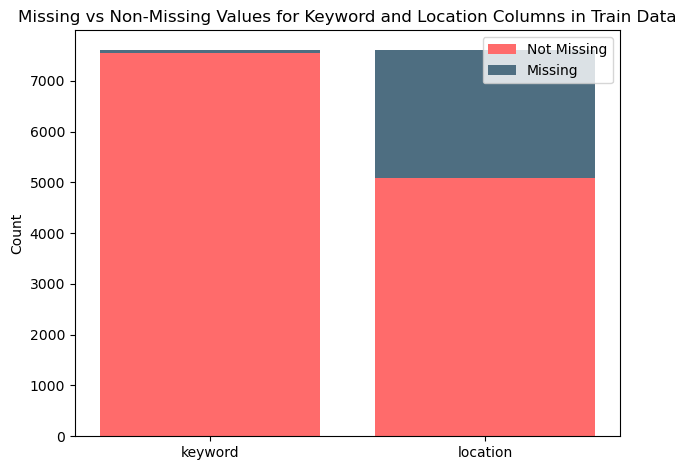

In [22]:
# Generate visualization to show missing values
import matplotlib.pyplot as plt

# Count NaN and non-NaN values for each column
keyword_location = original_train_data[['keyword', 'location']]
nan_counts = keyword_location.isna().sum()
non_nan_counts = keyword_location.notna().sum()

# Create stacked bar plot
columns = keyword_location.columns
x = range(len(columns))

plt.bar(x, non_nan_counts, label='Not Missing', color='#FF6B6B')
plt.bar(x, nan_counts, bottom=non_nan_counts, label='Missing', color='#4E6E81')

# Formatting
plt.xticks(ticks=x, labels=columns)
plt.ylabel('Count')
plt.title('Missing vs Non-Missing Values for Keyword and Location Columns in Train Data')
plt.legend()
plt.tight_layout()
plt.show()


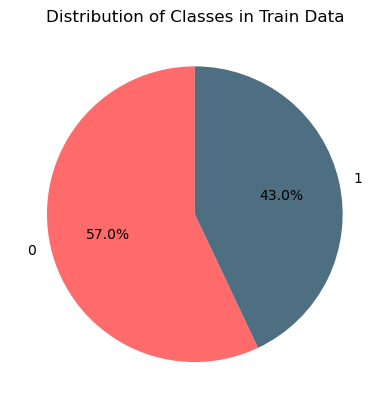

In [21]:
target_counts = original_train_data['target'].value_counts()
custom_colors = ['#FF6B6B', '#4E6E81']
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=90, 
        colors=custom_colors)
plt.title("Distribution of Classes in Train Data")
plt.show()

In [13]:
nan_counts

keyword       61
location    2533
dtype: int64

In [15]:
non_nan_counts

keyword     7552
location    5080
dtype: int64

In [8]:
scores_data = pd.read_csv("./data/final_model_scores.csv")

In [9]:
scores_data.head()

,Unnamed: 0,model,train,val,test
0,0,knn (n=10),0.790312,0.723572,0.74563
1,1,multinomial NB,0.880624,0.786605,0.78823
2,2,decision tree (max_depth=50),0.850739,0.754432,0.74747
3,3,random forest,0.810000,0.774787,0.77000
4,4,stacking clf,0.885222,0.778070,0.77290


In [10]:
scores_data = scores_data.drop(columns=['Unnamed: 0'])

In [11]:
scores_data.head()

,model,train,val,test
0,knn (n=10),0.790312,0.723572,0.74563
1,multinomial NB,0.880624,0.786605,0.78823
2,decision tree (max_depth=50),0.850739,0.754432,0.74747
3,random forest,0.810000,0.774787,0.77000
4,stacking clf,0.885222,0.778070,0.77290


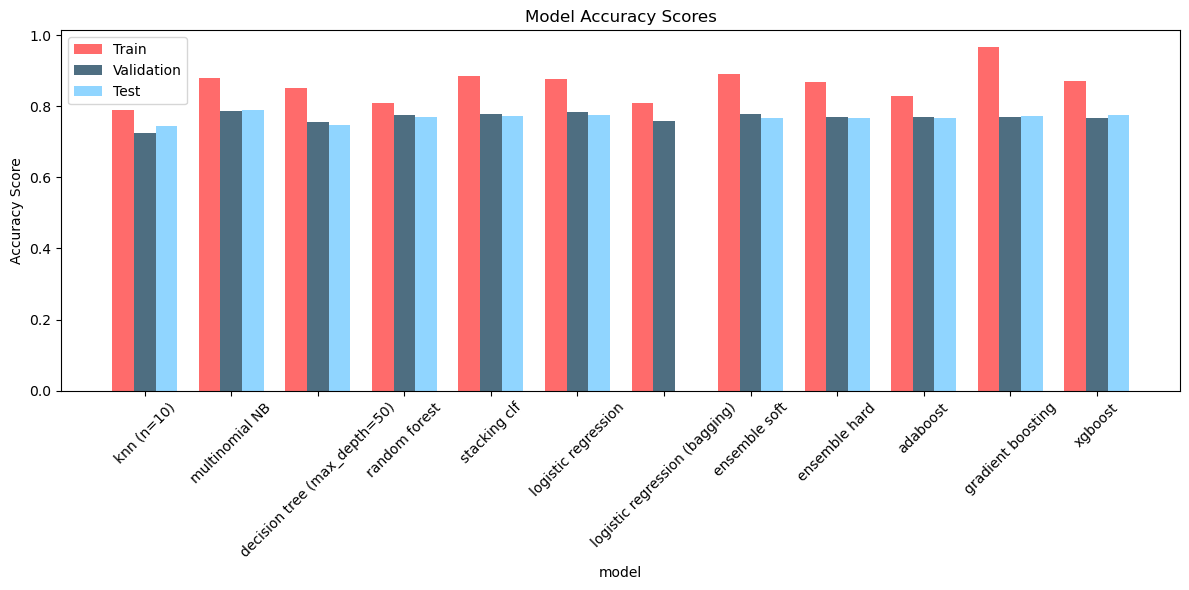

In [12]:
x = np.arange(len(scores_data['model']))  # the label locations
width = 0.25  # the width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot each category
ax.bar(x - width, scores_data['train'], width, label='Train', color='#FF6B6B')
ax.bar(x, scores_data['val'], width, label='Validation', color='#4E6E81')
ax.bar(x + width, scores_data['test'], width, label='Test', color='#90D5FF')

# Add labels, title, and legend
ax.set_xlabel('model')
ax.set_ylabel('Accuracy Score')
ax.set_title('Model Accuracy Scores')
ax.set_xticks(x)
plt.xticks(rotation=45)
ax.set_xticklabels(scores_data['model'])
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [13]:
scores_data.columns

Index(['model', 'train', 'val', 'test'], dtype='object')

In [26]:
import pandas as pd
import plotly.express as px
# Melt the DataFrame to long format for Plotly
scores_long = scores_data.melt(id_vars='model', var_name='Category', value_name='Score')

# Create an interactive bar plot
fig = px.bar(
    scores_long,
    x='model',
    y='Score',
    color='Category',
    barmode='group',
    title='Model Accuracy Scores',
    labels={'Score': 'Accuracy Score', 'model': 'Model', 'Category': 'Set Score'}
)

# Update layout for better interactivity
fig.update_layout(
    xaxis_title='Model',
    yaxis_title='Accuracy Score',
    legend_title='Set Score',
    template='plotly_white',
    width=1000,
    height=550
)
fig.write_html('../docs/scores.html')
# Show the interactive plot
fig.show()